# Best Neighborhoods to Rob in Pittsburgh
### According to Educational and Employment Data
#### _by Alejandro Ciuba_ from Team "Totally Not Using This Data For Nefarious Purposes"

In [2]:
#Importing the libraries to use for the data analysis
import pandas as pd
import numpy as np
import matplotlib

# Introduction 

For my part of the project, I will be analyzing which neighborhoods would be the best to rob according to educational/income and job datasets provided by [The WPRDC](http://www.wprdc.org). First, I will analyze the educational/income dataset to determine which neighborhoods in Pittsburgh are the _"oldest"_ and _"richest"_, since that demographic of people would be perfect to mug. They are less likely to do any bodily damage to you should they fight back, and they have a lot of money; these factors would make these neighborhoods prime targets for muggings.

## Education/Income Dataset

The first dataset, [_"Education-Income 2010"_](https://data.wprdc.org/dataset/pgh/resource/f7b19c6c-aa66-419b-b0e1-9998d7ddfcbc), provides us several important pieces of data for each neighborhood: average education obtained, average income, and the estimated percentage of the neighborhood under the poverty line. All of these will provide useful information from which we can draw conclusions about which neighborhoods are the best to rob depending on what a thief wants.

In [3]:
#Import the dataset from the link
edu_inc = pd.read_csv("education-income.csv")

#Read the beginning of the dataset
edu_inc.head(10)

,Neighborhood,Sector #,Population (2010),"Total Pop, 25 and older (2010)",Edu. Attainment: Less than High School (2010),Edu. Attainment: High School Graduate (2010),Edu. Attainment: Assoc./Prof. Degree (2010),Edu. Attainment: Bachelor's Degree (2010),Edu. Attainment: Postgraduate Degree (2010),1999 Median Income ('99 Dollars),2009 Median Income ('09 Dollars),1999 Median Income ('11 Dollars),2009 Med. Income ('13 Dollars),Est. Pop. for which Poverty Calc. (2010),Est. Pop. Under Poverty (2010),Est. Percent Under Poverty (2010)
0,Allegheny Center,3,933,609,18.7%,44.5%,17.2%,15.8%,3.8%,"$16,964","$20,911","$22,535","$22,793",954,324,34.0%
1,Allegheny West,3,462,239,9.2%,28.9%,6.7%,44.8%,10.5%,"$26,638","$41,761","$35,386","$45,519",239,12,5.0%
2,Allentown,6,"2,500","1,729",23.0%,63.3%,6.6%,5.6%,1.5%,"$22,539","$29,274","$29,941","$31,909","2,212",630,28.5%
3,Arlington,7,"1,869","1,232",14.9%,65.3%,10.1%,7.1%,2.5%,"$27,167","$25,119","$36,089","$27,380","1,779",361,20.3%
4,Arlington Heights,7,244,166,18.1%,74.1%,0.0%,7.8%,0.0%,"$18,646","$9,417","$24,769","$10,265",293,169,57.7%
5,Banksville,5,"4,144","3,935",9.8%,51.5%,9.8%,22.3%,6.6%,"$38,555","$50,625","$51,217","$55,181","4,170",243,5.8%
6,Bedford Dwellings,15,"1,202",733,8.3%,49.9%,12.8%,14.2%,14.7%,"$8,955","$9,992","$11,896","$10,891","1,203",589,49.0%
7,Beechview,5,"7,974","5,211",11.0%,58.1%,11.1%,13.6%,6.2%,"$34,079","$36,602","$45,270","$39,896","7,450","1,366",18.3%
8,Beltzhoover,6,"1,925","1,369",19.3%,54.3%,13.8%,8.3%,4.2%,"$26,750","$33,869","$35,535","$36,917","2,066",485,23.5%
9,Bloomfield,12,"8,442","6,671",11.2%,42.6%,8.6%,24.1%,13.5%,"$23,831","$30,830","$31,658","$33,604","9,192","1,781",19.4%


We will first group the data by education obtained for each type of education.

Text(0, 0.5, 'Percentage of Pop.')

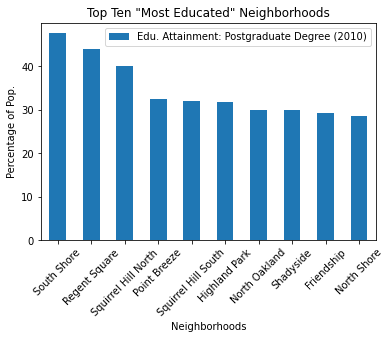

In [4]:
edu_lths = edu_inc.loc[:,["Neighborhood", "Edu. Attainment: Postgraduate Degree (2010)"]]

#Drop NaN values, and reindex
edu_lths = edu_lths.dropna()
edu_lths.reset_index(drop=True, inplace=True)

#Convert % strings to numerical data
for x in range(len(edu_lths)):

    #change that value to a float
    edu_lths.loc[x, "Edu. Attainment: Postgraduate Degree (2010)"] = float(edu_lths.loc[x, "Edu. Attainment: Postgraduate Degree (2010)"].split("%")[0])
    
#Sort the data and get the top ten "Most Educated" neighborhoods
edu_lths = edu_lths.sort_values(by="Edu. Attainment: Postgraduate Degree (2010)", ascending=False)
edu_lths_topten = edu_lths.head(10)

#Create the graph
graph_1 = edu_lths_topten.plot(kind="bar", title="Top Ten \"Most Educated\" Neighborhoods", x="Neighborhood", rot=45)
graph_1.set_xlabel("Neighborhoods")
graph_1.set_ylabel("Percentage of Pop.")

Here is a bar graph showing the top ten "most educated" neighborhoods in Pittsburgh, and what percentage of each neighborhood has obtained a PhD/Master's Degree in some field. Ignoring security factors and basing our observations solely on valuables to rob, it makes the most sense to attack these neighborhoods as they could have the most in items such as expensive research paper, valuable data, and expensive researching equipment. All of which could garner hefty prices on some black market.

Now, the goal is to compare the top ten richest neighborhoods in Pittsburgh and the list of top ten "most educated" neighborhoods to see if there is a set of neighborhoods that meet both criteria.